In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline


In [50]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')
match_ids = matches[matches.season >= 2016]['id'].unique()
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [51]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [52]:
team_1 = 'Royal Challengers Bangalore'
team_2 = 'Sunrisers Hyderabad'

In [53]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_runs'] = delivery['batsman_runs'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

# Winning Probability of Teams

Text(0.5, 1.0, 'SRH Total Runs Score Stats Per Count')

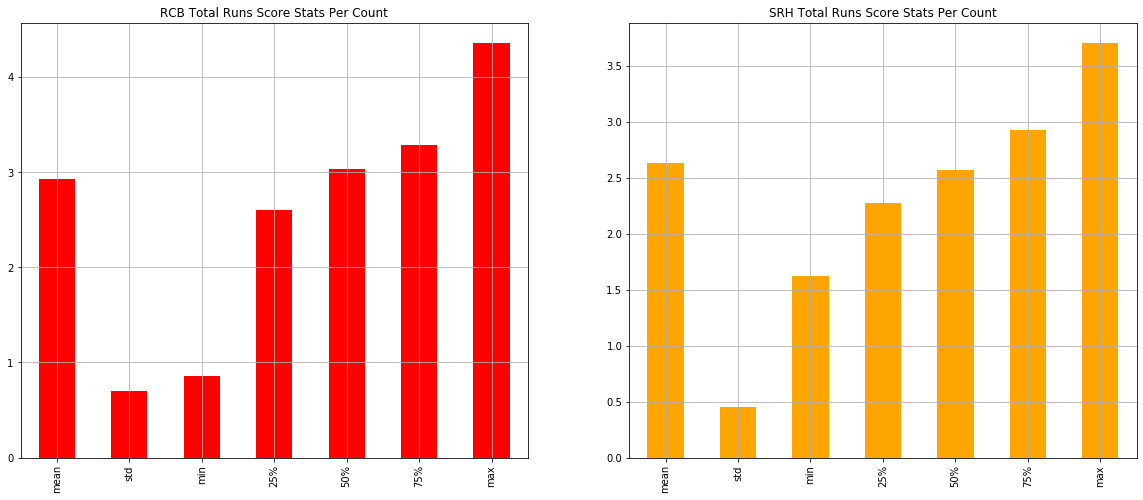

In [54]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
rcb_runs = delivery[delivery['batting_team']==team_1].groupby('match_id').sum()['total_runs']
srh_runs = delivery[delivery['batting_team']==team_2].groupby('match_id').sum()['total_runs']
(rcb_runs.describe()[1:]/rcb_runs.describe()[0]).plot(ax=ax[0], kind='bar', grid=True, color='r')
(srh_runs.describe()[1:]/srh_runs.describe()[0]).plot(ax=ax[1], kind='bar', grid=True, color='orange')
ax[0].set_title("RCB Total Runs Score Stats Per Count")
ax[1].set_title("SRH Total Runs Score Stats Per Count")

Text(0.5, 1.0, 'Percentage of Winning')

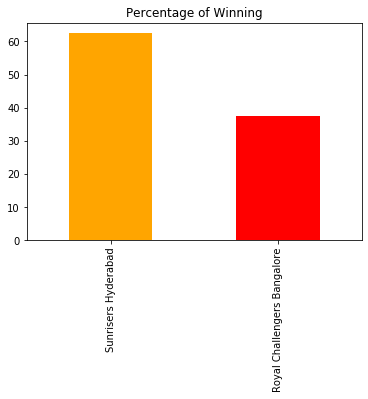

In [55]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
wins['Percentage Win Chance'].plot(kind='bar', color=['orange', 'r'])
plt.title('Percentage of Winning')

# Total Runs Scored

Text(0.5, 1.0, 'Score of SRH against RCB')

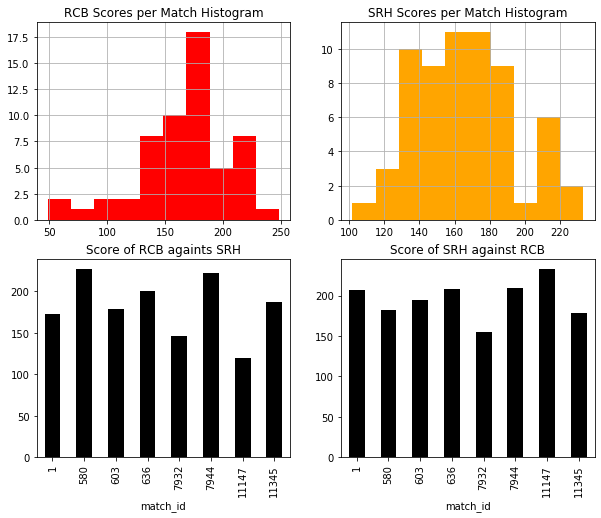

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
delivery[(delivery['batting_team']==team_1)].groupby('match_id').sum()['total_runs'].hist(ax=ax[0, 0], color='red')
delivery[(delivery['batting_team']==team_2)].groupby('match_id').sum()['total_runs'].hist(ax=ax[0, 1], color='orange')
delivery[(delivery['batting_team']==team_1) & (delivery['bowling_team']==team_2)].groupby('match_id').sum()['total_runs'].plot(ax=ax[1, 0], kind='bar', color='black')
delivery[(delivery['batting_team']==team_2) & (delivery['bowling_team']==team_1)].groupby('match_id').sum()['total_runs'].plot(ax=ax[1, 1], kind='bar', color='black')
ax[0, 0].set_title('RCB Scores per Match Histogram')
ax[0, 1].set_title('SRH Scores per Match Histogram')
ax[1, 0].set_title('Score of RCB againts SRH')
ax[1, 1].set_title('Score of SRH against RCB')

The plot suggests that the score generally is around or little more than 180 for both the teams.
So, range is 361 or more

# Difference betwee balls to make 30 runs after team total of 50

count    57.00000
mean     21.45614
std       8.36675
min       0.00000
25%      16.00000
50%      21.00000
75%      27.00000
max      40.00000
Name: Balls, dtype: float64


Text(0.5, 1.0, 'Histogram of Balls to score more 30 runs by RCB')

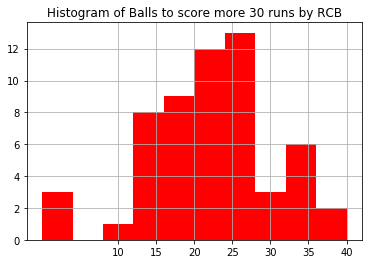

In [57]:
rcb_30 = list()
for match_id in delivery[(delivery['batting_team']==team_1)]['match_id'].unique():
    balls_50, balls_30 = 0, 0
    runs_50 = 0
    for run in delivery[(delivery['batting_team']==team_1) & (delivery['match_id']==match_id)]['total_runs']:
        balls_50 += 1
        runs_50 += run
        
        if runs_50 in range(50, 56):
            break

    runs_80 = runs_50
    for run in delivery[(delivery['batting_team']==team_1) & (delivery['match_id']==match_id)]['total_runs'][balls_80:]:
        balls_30 += 1
        runs_80 += run
        
        if runs_80>=(runs_50+30):
            break
    rcb_30.append([match_id, runs_50, runs_80, balls_30])   
    
rcb_30_df = pd.DataFrame(data=rcb_30, columns=['match_id', '50 Runs','30 more Runs', 'Balls'])
print(rcb_30_df['Balls'].describe())
rcb_30_df['Balls'].hist(color='red')
plt.xticks([10, 15, 20, 25, 30, 35, 40])
plt.title("Histogram of Balls to score more 30 runs by RCB")

count    63.000000
mean     23.031746
std       6.798881
min      13.000000
25%      18.000000
50%      22.000000
75%      26.000000
max      45.000000
Name: Balls, dtype: float64


Text(0.5, 1.0, 'Histogram of Balls to score more 30 runs by SRH')

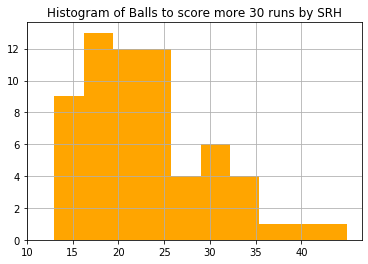

In [58]:
srh_30 = list()
for match_id in delivery[(delivery['batting_team']==team_2)]['match_id'].unique():
    balls_50, balls_30 = 0, 0
    runs_50 = 0
    for run in delivery[(delivery['batting_team']==team_2) & (delivery['match_id']==match_id)]['total_runs']:
        balls_50 += 1
        runs_50 += run
        
        if runs_50 in range(50, 56):
            break

    runs_80 = runs_50
    for run in delivery[(delivery['batting_team']==team_2) & (delivery['match_id']==match_id)]['total_runs'][balls_80:]:
        balls_30 += 1
        runs_80 += run
        
        if runs_80>=(runs_50+30):
            break
    srh_30.append([match_id, runs_50, runs_80, balls_30])   
    
srh_30_df = pd.DataFrame(data=srh_30, columns=['match_id', '50 Runs','30 more Runs', 'Balls'])
print(srh_30_df['Balls'].describe())
srh_30_df['Balls'].hist(color='orange')
plt.xticks([10, 15, 20, 25, 30, 35, 40])
plt.title("Histogram of Balls to score more 30 runs by SRH")

The number of balls for both the teams is generally same or very close to each other, so the range would be 0-8

# Difference of Wickets lose in powerplay

Generally, they have equal or 1 more or less wicket fall in powerplay


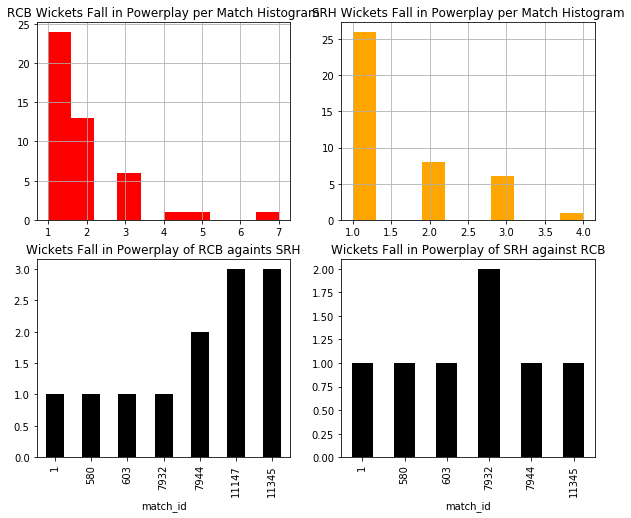

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
delivery[(delivery['batting_team']==team_1) & (delivery['player_dismissed']==1) & (delivery['over']<=6)].groupby('match_id').sum()['player_dismissed'].hist(ax=ax[0, 0], color='red')
delivery[(delivery['batting_team']==team_2) & (delivery['player_dismissed']==1) & (delivery['over']<=6)].groupby('match_id').sum()['player_dismissed'].hist(ax=ax[0, 1], color='orange')
delivery[(delivery['batting_team']==team_1) & (delivery['bowling_team']==team_2) & (delivery['player_dismissed']==1) & (delivery['over']<=6)].groupby('match_id').sum()['player_dismissed'].plot(ax=ax[1, 0], kind='bar', color='black')
delivery[(delivery['batting_team']==team_2) & (delivery['bowling_team']==team_1) & (delivery['player_dismissed']==1) & (delivery['over']<=6)].groupby('match_id').sum()['player_dismissed'].plot(ax=ax[1, 1], kind='bar', color='black')
ax[0, 0].set_title('RCB Wickets Fall in Powerplay per Match Histogram')
ax[0, 1].set_title('SRH Wickets Fall in Powerplay per Match Histogram')
ax[1, 0].set_title('Wickets Fall in Powerplay of RCB againts SRH')
ax[1, 1].set_title('Wickets Fall in Powerplay of SRH against RCB')
print("Generally, they have equal or 1 more or less wicket fall in powerplay")

The difference between wickets is generally 0 or 1. So, range would be 0-1.


# Dot-balls

count    57.000000
mean     38.210526
std       9.792010
min       8.000000
25%      33.000000
50%      39.000000
75%      44.000000
max      62.000000
Name: total_runs, dtype: float64


Text(0.5, 1.0, 'Dot Balls Histogram when batting team is RCB')

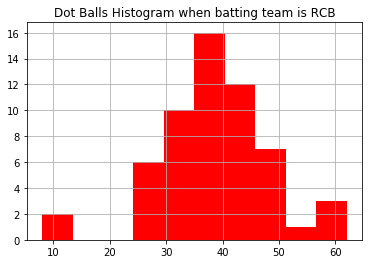

In [60]:
rcb_dot = delivery[(delivery['batting_team']==team_1)& (delivery['total_runs']==0)].groupby('match_id').count()['total_runs']
rcb_dot.hist(color='red')
print(rcb_dot.describe())
plt.title("Dot Balls Histogram when batting team is RCB")

count    63.000000
mean     38.285714
std       9.158864
min      19.000000
25%      33.000000
50%      38.000000
75%      45.000000
max      55.000000
Name: total_runs, dtype: float64


Text(0.5, 1.0, 'Dot Balls Histogram when batting team is SRH')

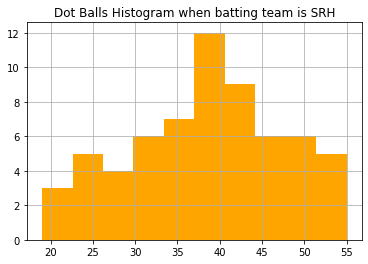

In [61]:
srh_dot = delivery[(delivery['batting_team']==team_2) & (delivery['total_runs']==0)].groupby('match_id').count()['total_runs']
srh_dot.hist(color='orange')
print(srh_dot.describe())
plt.title("Dot Balls Histogram when batting team is SRH")

The sum of mean balls of both the teams lies in the range 60-80.

# Summary

1. Different central tendency measures were plotted and compared for both the teams total match score. The winning chances of both the team were calculated using the winner column when played against each other.
2. Histogram plots for teams score per match against other teams where plotted and the range was estimated summing mean values.
3. Balls to reach teams score of around 50 and then after that balls to score 30 more runs was calculated for both teams per match against others using total_runs column and subtracted and after comparing mean values, the range of difference in balls was calculated.
4. Wickets lose of both teams in powerplay against each other and against all was calculated by filtering data when  player_dismissed is 1 and overs less than, equal to 6 and graphed to compare the difference in the number of wickets. 
5. Individual team dot balls per match was calculated using total_runs column by filtering when the value is 0 and histogram plotted. 